# Look at Affects of Noise

Here we will look at different affects of noise.



In [9]:
import numpy as np
from mth5.data.make_mth5_from_asc import create_test12rr_h5
from mth5.data.paths import SyntheticTestPaths
from mth5.mth5 import MTH5

from mtpy.processing import AuroraProcessing


In [10]:
synthetic_test_paths = SyntheticTestPaths()
target_folder = synthetic_test_paths.mth5_path
mth5_path = target_folder.joinpath("test12rr.h5")
if not mth5_path.exists():
    create_test12rr_h5(target_folder=target_folder)  



2024-10-16T17:13:42.590962-0700 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.1.0 file C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mth5\mth5\data\mth5\test12rr.h5 in mode w
2024-10-16T17:13:45.391063-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mth5\mth5\data\mth5\test12rr.h5


### Noise

We can define some noise methods.



In [11]:
def get_ac_noise(time, amplitude, period):
    """
    Create a sinusoidal noise signal

    time: array of time sampled at a single sample rate
    amplitude: amplitude of the sinusoidal signal
    period: period of the sinusoid in seconds
    """
    return amplitude * np.sin(2 * np.pi * (1 / period) * time)

In [12]:
def get_impulses(time, max_amplitude, n_impulses=50):
    """
    Create a random series of impulses

    time: array of time sampled at a single sample rate
    max_amplitude: amplitude of the impulses
    n_impulses: number of impulses to add
    """
    imp = np.zeros_like(time)
    for ii in range(n_impulses):
        index = np.random.randint(0, imp.size)
        amplitude = (-1)**(np.random.randint(0, 9))*np.random.randint(1, max_amplitude)
        imp[index] = amplitude
    return imp

In [13]:
def get_periodic_noise_electric(time, period=4, repeat=16, max_amplitude=8000):
    """
    Create a series of periodic box cars often seen in electric channels

    time: array of time sampled at a single sample rate
    period: the length of the box car
    repeat: number of samples the box car is repeated
    max_amplitude: maximum amplitude of the box car
    """
    comb = np.zeros_like(time)
    for ii in np.linspace(0, comb.size-(period + 1), repeat):
        comb[int(ii): int(ii)+period] = 1 * max_amplitude
    return comb 

In [14]:
def get_periodic_noise_magnetic(time, period=4, repeat=16, max_amplitude=8000):
    """
    Create a series of periodic box cars responses often seen in magnetic channels

    time: array of time sampled at a single sample rate
    period: the length of the box car
    repeat: number of samples the box car is repeated
    max_amplitude: maximum amplitude of the box car
    """
    comb = np.zeros_like(time)
    for ii in np.linspace(0, comb.size-(period + 1), repeat):
        comb[int(ii)] = 1 * max_amplitude
        comb[int(ii)+period] = -1 * max_amplitude

    gauss = np.exp(np.arange(period)**2 / repeat)
    gauss = gauss / gauss.max() 
    response = max_amplitude * gauss
    comb = np.convolve(comb, response, mode="same")
    return comb 

2024-10-16T17:16:29.615570-0700 | INFO | mth5.groups.base | _add_group | RunGroup 12s_sinusoid already exists, returning existing group.
2024-10-16T17:16:29.733268-0700 | WARNING | mth5.groups.run | from_runts | Channel run.id 001 !=  group run.id 12s_sinusoid. Setting to ch.run_metadata.id to 12s_sinusoid
2024-10-16T17:16:29.877881-0700 | WARNING | mth5.groups.run | from_runts | Channel run.id 001 !=  group run.id 12s_sinusoid. Setting to ch.run_metadata.id to 12s_sinusoid
2024-10-16T17:16:30.021402-0700 | WARNING | mth5.groups.run | from_runts | Channel run.id 001 !=  group run.id 12s_sinusoid. Setting to ch.run_metadata.id to 12s_sinusoid
2024-10-16T17:16:30.163428-0700 | WARNING | mth5.groups.run | from_runts | Channel run.id 001 !=  group run.id 12s_sinusoid. Setting to ch.run_metadata.id to 12s_sinusoid
2024-10-16T17:16:30.314018-0700 | WARNING | mth5.groups.run | from_runts | Channel run.id 001 !=  group run.id 12s_sinusoid. Setting to ch.run_metadata.id to 12s_sinusoid


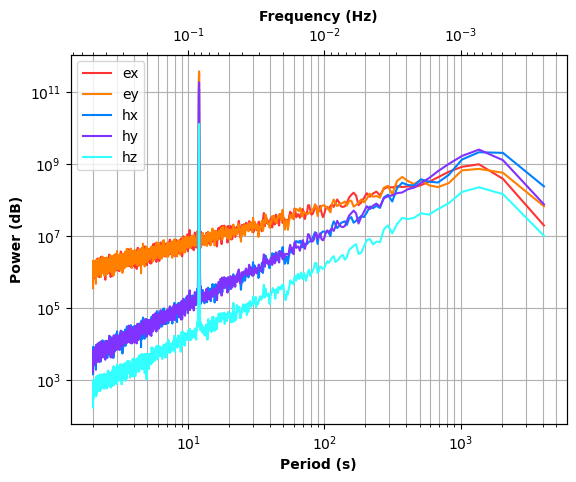

2024-10-16T17:16:32.328927-0700 | INFO | mth5.groups.base | _add_group | RunGroup impulses already exists, returning existing group.
2024-10-16T17:16:32.443571-0700 | WARNING | mth5.groups.run | from_runts | Channel run.id 001 !=  group run.id impulses. Setting to ch.run_metadata.id to impulses
2024-10-16T17:16:32.588191-0700 | WARNING | mth5.groups.run | from_runts | Channel run.id 001 !=  group run.id impulses. Setting to ch.run_metadata.id to impulses
2024-10-16T17:16:32.741385-0700 | WARNING | mth5.groups.run | from_runts | Channel run.id 001 !=  group run.id impulses. Setting to ch.run_metadata.id to impulses
2024-10-16T17:16:32.881000-0700 | WARNING | mth5.groups.run | from_runts | Channel run.id 001 !=  group run.id impulses. Setting to ch.run_metadata.id to impulses
2024-10-16T17:16:33.026204-0700 | WARNING | mth5.groups.run | from_runts | Channel run.id 001 !=  group run.id impulses. Setting to ch.run_metadata.id to impulses


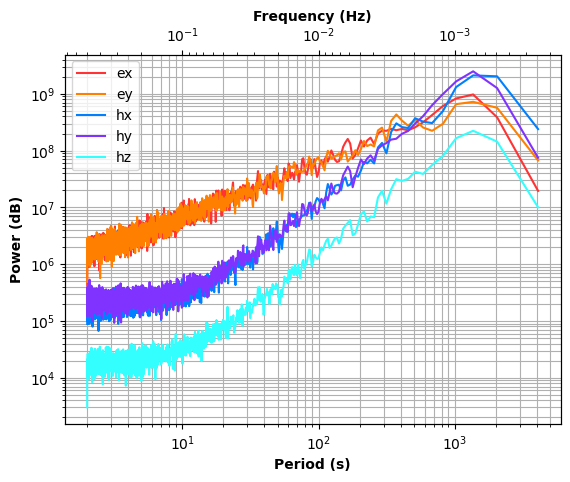

ex max amplitude 12433
ey max amplitude 13288
hx max amplitude 57289.761
hy max amplitude 87441.201
hz max amplitude 6102.135
2024-10-16T17:16:35.294025-0700 | INFO | mth5.groups.base | _add_group | RunGroup periodic already exists, returning existing group.
2024-10-16T17:16:35.407580-0700 | WARNING | mth5.groups.run | from_runts | Channel run.id 001 !=  group run.id periodic. Setting to ch.run_metadata.id to periodic
2024-10-16T17:16:35.563701-0700 | WARNING | mth5.groups.run | from_runts | Channel run.id 001 !=  group run.id periodic. Setting to ch.run_metadata.id to periodic
2024-10-16T17:16:35.706316-0700 | WARNING | mth5.groups.run | from_runts | Channel run.id 001 !=  group run.id periodic. Setting to ch.run_metadata.id to periodic
2024-10-16T17:16:35.850362-0700 | WARNING | mth5.groups.run | from_runts | Channel run.id 001 !=  group run.id periodic. Setting to ch.run_metadata.id to periodic
2024-10-16T17:16:35.989910-0700 | WARNING | mth5.groups.run | from_runts | Channel run.id

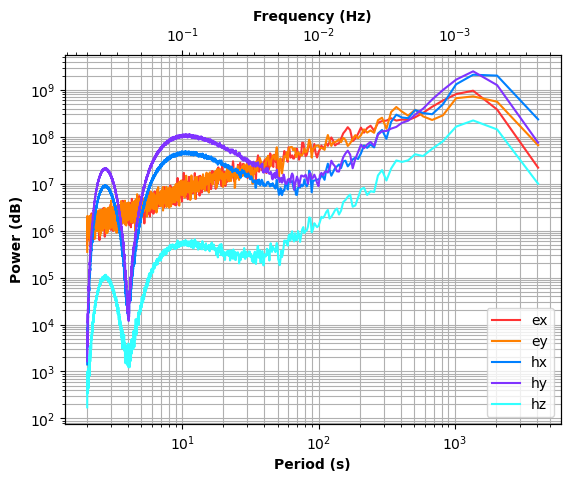

2024-10-16T17:16:37.463360-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mth5\mth5\data\mth5\test12rr.h5


In [17]:
with MTH5() as m:
    m = m.open_mth5(mth5_path)
    runts = m.get_run("test1", "001").to_runts()
    t = np.arange(len(runts.dataset.time))

    # add AC noise
    new_run = runts.copy()
    new_run.run_metadata.id = "12s_sinusoid"
    for channel in new_run.channels:
        ch = getattr(new_run, channel)
        ac_noise = get_ac_noise(t, 2*ch.ts.max(), 12)
        ch.ts = ch.ts + ac_noise
        setattr(new_run, channel, ch)
    rg = m.add_run("test1", new_run.run_metadata.id)
    rg.from_runts(new_run)

    new_run.plot_spectra()

    # add impulse noise
    new_run = runts.copy()
    new_run.run_metadata.id = "impulses"
    for channel in new_run.channels:
        ch = getattr(new_run, channel)
        impulse_noise = get_impulses(t, 2*ch.ts.max(), 100)
        ch.ts = ch.ts + impulse_noise
        setattr(new_run, channel, ch)
    rg = m.add_run("test1", new_run.run_metadata.id)
    rg.from_runts(new_run)

    new_run.plot_spectra()

    # add periodic noise
    new_run = runts.copy()
    new_run.run_metadata.id = "periodic"
    for channel in new_run.channels:
        ch = getattr(new_run, channel)
        if ch.component in ["ex", "ey"]:
            periodic_noise = get_periodic_noise_electric(t, max_amplitude=1.5*ch.ts.max())
        elif ch.component in ["hx", "hy", "hz"]:
            periodic_noise = get_periodic_noise_magnetic(t, max_amplitude=1.5*ch.ts.max())*1E-3
        ch.ts = ch.ts + periodic_noise
        setattr(new_run, channel, ch)
    rg = m.add_run("test1", new_run.run_metadata.id)
    rg.from_runts(new_run)

    new_run.plot_spectra()


## Process with Aurora

Now that we've added noise lets see what it does to the MT response.

In [18]:
ap = AuroraProcessing()
ap.local_station_id = "test1"
ap.remote_station_id = None
ap.local_mth5_path = mth5_path
ap.remote_mth5_path = mth5_path

### Run Summary

We need to get just the runs that we want to process. Include the remote run.

In [19]:
run_summary = ap.get_run_summary()
run_summary.mini_summary

2024-10-16T17:17:43.524722-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mth5\mth5\data\mth5\test12rr.h5


,survey,station,run,start,end,duration
0,EMTF Synthetic,test1,001,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,39999.0
1,EMTF Synthetic,test1,12s_sinusoid,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,39999.0
2,EMTF Synthetic,test1,impulses,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,39999.0
3,EMTF Synthetic,test1,periodic,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,39999.0
4,EMTF Synthetic,test2,001,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,39999.0


Here pick the runs you want to process.  Should pick one of the noisy runs and then the remote. The index is the first column.

In [20]:
noise_run_summary = run_summary.clone()
noise_run_summary.df = noise_run_summary.df.iloc[[3, 4]]
noise_run_summary.mini_summary

,survey,station,run,start,end,duration
3,EMTF Synthetic,test1,periodic,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,39999.0
4,EMTF Synthetic,test2,001,1980-01-01 00:00:00+00:00,1980-01-01 11:06:39+00:00,39999.0


## Process Single Station

Now process the noise type picked and see how that noise affects the data and how the remote reference helps mitigate that noise. 

2024-10-16T17:17:49.822709-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column fc, adding and setting dtype to <class 'pandas._libs.missing.NAType'>.
2024-10-16T17:17:49.823726-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column remote, adding and setting dtype to <class 'bool'>.
2024-10-16T17:17:49.825729-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column run_dataarray, adding and setting dtype to <class 'NoneType'>.
2024-10-16T17:17:49.827713-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column stft, adding and setting dtype to <class 'NoneType'>.
2024-10-16T17:17:49.829714-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column mth5_obj, adding and setting dtype to <class 'NoneType'>.
2024-10-16T17:17:49.839709-0700 | INFO | aurora.config.config_creator | 

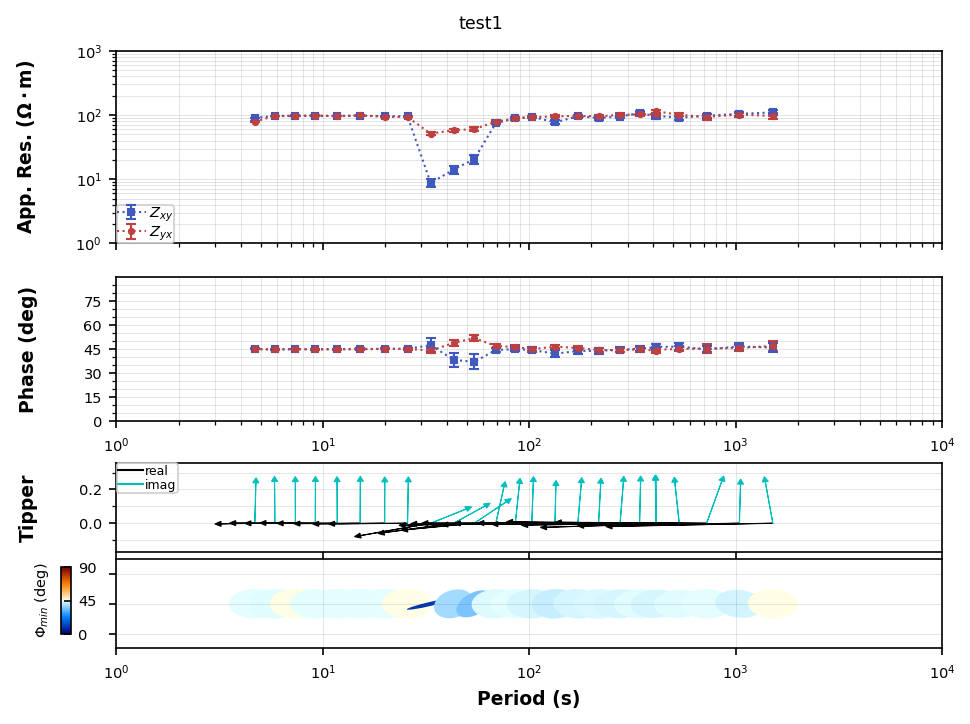

Plotting PlotMTResponse

In [21]:
kds = ap.create_kernel_dataset(run_summary=noise_run_summary, local_station_id="test1")
config = ap.create_config(kds)
mt_12s_noise = ap.process_single_sample_rate(1, config, kds)
mt_12s_noise.plot_mt_response()

## Remote Reference Processing

Now we can try to reduce the effect of local noise by using a remote reference.  In this case the remote helps only slightly because the time series is short and there aren't that many estimates.  If we had longer time series the remote would help more.  

There are other things you can do to the data. You could apply a notch filter at the frequency your noise is at if you are certain that it is a pure sinusoid.  

2024-10-16T17:18:20.105869-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column fc, adding and setting dtype to <class 'pandas._libs.missing.NAType'>.
2024-10-16T17:18:20.108872-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column remote, adding and setting dtype to <class 'bool'>.
2024-10-16T17:18:20.109869-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column run_dataarray, adding and setting dtype to <class 'NoneType'>.
2024-10-16T17:18:20.110869-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column stft, adding and setting dtype to <class 'NoneType'>.
2024-10-16T17:18:20.111868-0700 | INFO | mtpy.processing.kernel_dataset | _add_columns | KernelDataset DataFrame needs column mth5_obj, adding and setting dtype to <class 'NoneType'>.
2024-10-16T17:18:20.129985-0700 | INFO | aurora.config.config_creator | 

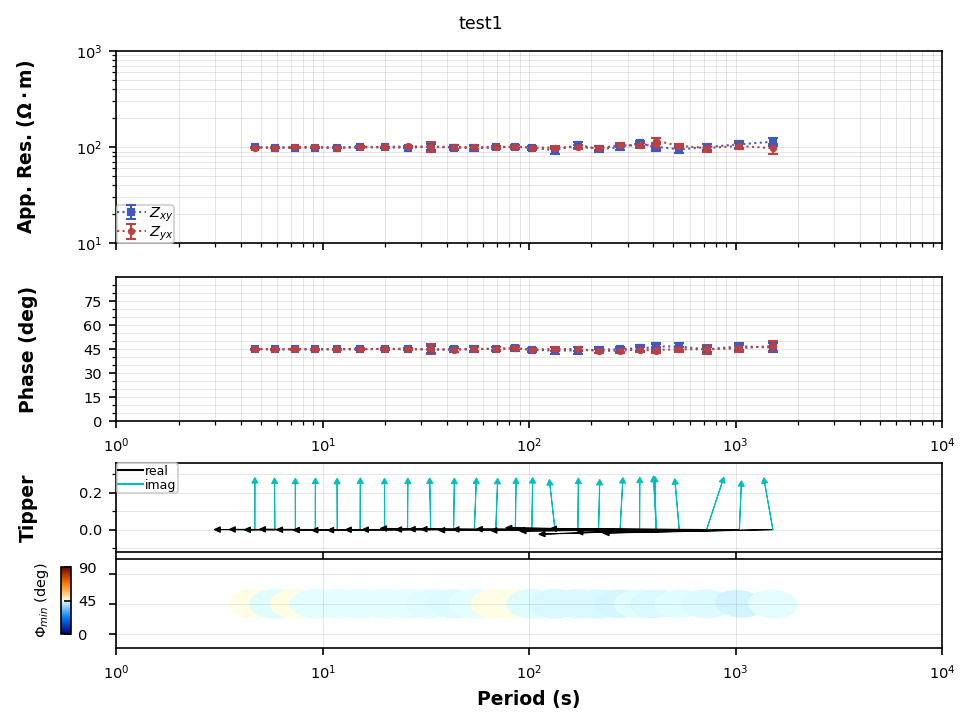

Plotting PlotMTResponse

In [22]:
kds = ap.create_kernel_dataset(
    run_summary=noise_run_summary, 
    local_station_id="test1",
    remote_station_id="test2"
    )
config = ap.create_config(kds)
mt_12s_noise_rr = ap.process_single_sample_rate(1, config, kds)
mt_12s_noise_rr.plot_mt_response()